# Introduction to File Manipulation and Plotting

- Operating system interaction: `os`
- File manipulation: `os.path`
- Arrays, record arrays and basic statistics: `numpy`
- Simple and Advanced Plotting: `matplotlib`


## Shell commands

In [1]:
# to call shell from IPython is to prepend an exclamation point to a shell command:
!pwd

/SNS/users/rhf/git/IPythonNotebookTutorial


In [2]:
!ls

0.0 - introduction.ipynb
1.0 - jupyter dashboard.ipynb
1.1 - jupyter not a book.ipynb
1.2 - markdown syntax.ipynb
1.3 - introduction to python (CLASS VERSION).ipynb
1.3 - introduction to python (FULL VERSION).ipynb
2 - Introduction to File Manipulation and Plotting.ipynb
3 - Multiple plots - Glob - advanced.ipynb
3 - Multiple plots - Glob.ipynb
4 - 2D Imaging - FITS.ipynb
4 - 2D Imaging - TIFF.ipynb
5 - Gaussian Fitting.ipynb
6 - HDF files.ipynb
7 - widgets.ipynb
Data
README.md
Untitled.ipynb
hdfview.png


In [3]:
# Data files
!ls Data/Glob

a1.dat	a3.dat	b2.dat	b4.dat	f2.txt	f4.txt	f6.txt	f8.txt	subdir1
a2.dat	b1.dat	b3.dat	f1.txt	f3.txt	f5.txt	f7.txt	f9.txt	subdir2


## Python `OS` module

In [4]:
# The same is possible with python
import os

os.getcwd()

'/SNS/users/rhf/git/IPythonNotebookTutorial'

In [5]:
# Note the output is a list!
os.listdir()

['Data',
 '5 - Gaussian Fitting.ipynb',
 '.ipynb_checkpoints',
 '2 - Introduction to File Manipulation and Plotting.ipynb',
 '0.0 - introduction.ipynb',
 '1.3 - introduction to python (CLASS VERSION).ipynb',
 '3 - Multiple plots - Glob - advanced.ipynb',
 'hdfview.png',
 '6 - HDF files.ipynb',
 'Untitled.ipynb',
 '.gitignore',
 '.git',
 '4 - 2D Imaging - FITS.ipynb',
 '3 - Multiple plots - Glob.ipynb',
 'README.md',
 '7 - widgets.ipynb',
 '1.1 - jupyter not a book.ipynb',
 '1.2 - markdown syntax.ipynb',
 '4 - 2D Imaging - TIFF.ipynb',
 '1.0 - jupyter dashboard.ipynb',
 '1.3 - introduction to python (FULL VERSION).ipynb']

In [6]:
os.listdir("Data/Glob")

['subdir2',
 'f2.txt',
 'f5.txt',
 'a2.dat',
 'subdir1',
 'f4.txt',
 'a3.dat',
 'f3.txt',
 'b1.dat',
 'f9.txt',
 'f7.txt',
 'b2.dat',
 'b3.dat',
 'b4.dat',
 'f6.txt',
 'a1.dat',
 'f1.txt',
 'f8.txt']

## File Manipulation: `os.path` module

In [7]:
# Let's pick one file
file_path = "Data/Glob/f1.txt"

In [8]:
import os.path
os.path.exists(file_path)

True

In [9]:
# show what is available in os.path
dir(os.path)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_get_sep',
 '_joinrealpath',
 '_varprog',
 '_varprogb',
 'abspath',
 'altsep',
 'basename',
 'commonpath',
 'commonprefix',
 'curdir',
 'defpath',
 'devnull',
 'dirname',
 'exists',
 'expanduser',
 'expandvars',
 'extsep',
 'genericpath',
 'getatime',
 'getctime',
 'getmtime',
 'getsize',
 'isabs',
 'isdir',
 'isfile',
 'islink',
 'ismount',
 'join',
 'lexists',
 'normcase',
 'normpath',
 'os',
 'pardir',
 'pathsep',
 'realpath',
 'relpath',
 'samefile',
 'sameopenfile',
 'samestat',
 'sep',
 'split',
 'splitdrive',
 'splitext',
 'stat',
 'supports_unicode_filenames',
 'sys']

### Exercise

1. Get only the file name of file_path
2. Get the full path of file_path
3. Get the directory where the file_path is
4. Absolute directory where file_path is

In [10]:
# 1. File name
os.path.basename(file_path)

'f1.txt'

In [11]:
# 2. Full path
os.path.abspath(file_path)

'/SNS/users/rhf/git/IPythonNotebookTutorial/Data/Glob/f1.txt'

In [12]:
# 3. Directory where the file is
os.path.dirname(file_path)

'Data/Glob'

In [13]:
# 4. Absolute directory where the file is
os.path.dirname(
    os.path.abspath(file_path)
)

'/SNS/users/rhf/git/IPythonNotebookTutorial/Data/Glob'

How to get the **file extension**:

In [14]:
prefix, suffix = os.path.splitext(file_path)
print("prefix = {}; suffix = {}; suffix without '.' = {}.".format(prefix, suffix, suffix[1:]))

prefix = Data/Glob/f1; suffix = .txt; suffix without '.' = txt.


In [15]:
# Extension
filename_only = os.path.basename(file_path)
print(filename_only)
print(filename_only.split("."))
print(filename_only.split(".")[-1])


f1.txt
['f1', 'txt']
txt


# Numpy Arrays

In [16]:
# Let's get back to our file
!head Data/Glob/f1.txt

# X , Y , E , DX
1
0.00232478,8.22832,0.677097,0.0020133
0.00458718,5.8915,0.193922,0.00192328
0.00684958,12.573,0.413909,0.00189569
0.00911198,37.3161,0.768022,0.00199785
0.0113744,156.672,2.59008,0.00205609
0.0136368,567.555,11.7842,0.00217489
0.0158992,1401.89,16.1017,0.00229348
0.0181616,1334.2,13.4719,0.00239931


**The file has:**
- header: `x`, `y`, `Err(y)`, `Err(x)`
        - This a 1D SANS I(Q) curve output by Mantid.
- Two rows header


### Reading `csv` files as `numpy` arrays

For the function `np.genfromtxt` see https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.genfromtxt.html

In [17]:
import numpy as np

In [18]:
data = np.genfromtxt(
    file_path,
)
# Data is meanlingless!
data

array([  1.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  n

In [19]:
import numpy as np
data = np.genfromtxt(
    file_path,
    delimiter=",",
    skip_header=2,
)
# Data is 2D numpy array: 200 rows, 4 columns
data

array([[  2.32478000e-03,   8.22832000e+00,   6.77097000e-01,
          2.01330000e-03],
       [  4.58718000e-03,   5.89150000e+00,   1.93922000e-01,
          1.92328000e-03],
       [  6.84958000e-03,   1.25730000e+01,   4.13909000e-01,
          1.89569000e-03],
       [  9.11198000e-03,   3.73161000e+01,   7.68022000e-01,
          1.99785000e-03],
       [  1.13744000e-02,   1.56672000e+02,   2.59008000e+00,
          2.05609000e-03],
       [  1.36368000e-02,   5.67555000e+02,   1.17842000e+01,
          2.17489000e-03],
       [  1.58992000e-02,   1.40189000e+03,   1.61017000e+01,
          2.29348000e-03],
       [  1.81616000e-02,   1.33420000e+03,   1.34719000e+01,
          2.39931000e-03],
       [  2.04240000e-02,   1.62173000e+03,   2.00042000e+01,
          2.47893000e-03],
       [  2.26864000e-02,   1.40312000e+03,   1.01434000e+01,
          2.56543000e-03],
       [  2.49488000e-02,   1.30591000e+03,   1.03458000e+01,
          2.60186000e-03],
       [  2.72112000e

In [20]:
data.shape

(200, 4)

In [21]:
data = np.genfromtxt(
    file_path,
    delimiter=",",
    skip_header=2,
    names=['X', 'Y', 'E', 'DX'],
)
# Data is now a structure array
data

array([( 0.00232478,   8.22832000e+00,   6.77097000e-01,  0.0020133 ),
       ( 0.00458718,   5.89150000e+00,   1.93922000e-01,  0.00192328),
       ( 0.00684958,   1.25730000e+01,   4.13909000e-01,  0.00189569),
       ( 0.00911198,   3.73161000e+01,   7.68022000e-01,  0.00199785),
       ( 0.0113744 ,   1.56672000e+02,   2.59008000e+00,  0.00205609),
       ( 0.0136368 ,   5.67555000e+02,   1.17842000e+01,  0.00217489),
       ( 0.0158992 ,   1.40189000e+03,   1.61017000e+01,  0.00229348),
       ( 0.0181616 ,   1.33420000e+03,   1.34719000e+01,  0.00239931),
       ( 0.020424  ,   1.62173000e+03,   2.00042000e+01,  0.00247893),
       ( 0.0226864 ,   1.40312000e+03,   1.01434000e+01,  0.00256543),
       ( 0.0249488 ,   1.30591000e+03,   1.03458000e+01,  0.00260186),
       ( 0.0272112 ,   7.52002000e+02,   6.22791000e+00,  0.00263457),
       ( 0.0294736 ,   5.86367000e+02,   3.34320000e+00,  0.00269503),
       ( 0.031736  ,   4.63746000e+02,   2.83678000e+00,  0.00273969),
      

In [22]:
# Attribute indexing
data.dtype

dtype([('X', '<f8'), ('Y', '<f8'), ('E', '<f8'), ('DX', '<f8')])

In [23]:
# X is a column in the file
data['X']

array([ 0.00232478,  0.00458718,  0.00684958,  0.00911198,  0.0113744 ,
        0.0136368 ,  0.0158992 ,  0.0181616 ,  0.020424  ,  0.0226864 ,
        0.0249488 ,  0.0272112 ,  0.0294736 ,  0.031736  ,  0.0339984 ,
        0.0362608 ,  0.0385232 ,  0.0407856 ,  0.043048  ,  0.0453104 ,
        0.0475728 ,  0.0498352 ,  0.0520976 ,  0.05436   ,  0.0566224 ,
        0.0588848 ,  0.0611472 ,  0.0634096 ,  0.065672  ,  0.0679344 ,
        0.0701968 ,  0.0724592 ,  0.0747216 ,  0.076984  ,  0.0792464 ,
        0.0815088 ,  0.0837712 ,  0.0860336 ,  0.088296  ,  0.0905584 ,
        0.0928208 ,  0.0950832 ,  0.0973456 ,  0.099608  ,  0.10187   ,
        0.104133  ,  0.106395  ,  0.108658  ,  0.11092   ,  0.113182  ,
        0.115445  ,  0.117707  ,  0.11997   ,  0.122232  ,  0.124494  ,
        0.126757  ,  0.129019  ,  0.131282  ,  0.133544  ,  0.135806  ,
        0.138069  ,  0.140331  ,  0.142594  ,  0.144856  ,  0.147118  ,
        0.149381  ,  0.151643  ,  0.153906  ,  0.156168  ,  0.15

In [24]:
arr = data['X']
arr.dtype

dtype('float64')

In [25]:
arr.shape

(200,)

## Array indexing and slicing

In [26]:
# First position
arr[0]

0.0023247799999999998

In [27]:
# Last position
arr[-1]

0.452542

In [28]:
# positions 20 to 24 (Note that index 25 is not included!!)
arr[20:25]

array([ 0.0475728,  0.0498352,  0.0520976,  0.05436  ,  0.0566224])

In [29]:
# Indexes: 0, 2, 4, etc
arr[::2]

array([ 0.00232478,  0.00684958,  0.0113744 ,  0.0158992 ,  0.020424  ,
        0.0249488 ,  0.0294736 ,  0.0339984 ,  0.0385232 ,  0.043048  ,
        0.0475728 ,  0.0520976 ,  0.0566224 ,  0.0611472 ,  0.065672  ,
        0.0701968 ,  0.0747216 ,  0.0792464 ,  0.0837712 ,  0.088296  ,
        0.0928208 ,  0.0973456 ,  0.10187   ,  0.106395  ,  0.11092   ,
        0.115445  ,  0.11997   ,  0.124494  ,  0.129019  ,  0.133544  ,
        0.138069  ,  0.142594  ,  0.147118  ,  0.151643  ,  0.156168  ,
        0.160693  ,  0.165218  ,  0.169742  ,  0.174267  ,  0.178792  ,
        0.183317  ,  0.187842  ,  0.192366  ,  0.196891  ,  0.201416  ,
        0.205941  ,  0.210466  ,  0.21499   ,  0.219515  ,  0.22404   ,
        0.228565  ,  0.23309   ,  0.237614  ,  0.242139  ,  0.246664  ,
        0.251189  ,  0.255714  ,  0.260238  ,  0.264763  ,  0.269288  ,
        0.273813  ,  0.278338  ,  0.282862  ,  0.287387  ,  0.291912  ,
        0.296437  ,  0.300962  ,  0.305486  ,  0.310011  ,  0.31

In [30]:
# Indexes: 20, 22, 24
arr[20:25:2]

array([ 0.0475728,  0.0520976,  0.0566224])

## Array Methods

In [31]:
dir(arr)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_e

### Exercise: get some basic statistics given the methods available in the `numpy` array

In [32]:
print("Max = {:.2}, Min = {:.2}, Average = {:.2}, Std Dev = {:.2}".format(
    arr.max(),
    arr.min(),
    arr.mean(),
    arr.std(),
))

Max = 0.45, Min = 0.0023, Average = 0.23, Std Dev = 0.13


In [33]:
# Normalisation to 1
arr_norm = (arr-arr.min())/(arr.max()-arr.min())

print("Max = {:.2}, Min = {:.2}, Average = {:.2}, Std Dev = {:.2}".format(
    arr_norm.max(),
    arr_norm.min(),
    arr_norm.mean(),
    arr_norm.std(),
))

Max = 1.0, Min = 0.0, Average = 0.5, Std Dev = 0.29


# Plotting

In [34]:
# Choose your backend (the way the plots are rendered in a notebook)
%matplotlib notebook

# matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt

# Choose the default figure size
# plt.rcParams["figure.figsize"] = (12,8)

In [35]:
# Simple case
fig, ax = plt.subplots()
ax.plot(data['X'], data['Y'])

<IPython.core.display.Javascript object>

In [36]:
# Let's label some stuff
# Simple Labels. Part 3 introduces axes manipulation
fig, ax = plt.subplots()
ax.set_title("$y = f(x)$")
ax.set_xlabel("Axis X")
ax.set_ylabel("Axis y")
# Marker symbols: https://matplotlib.org/api/markers_api.html
ax.plot(data['X'], data['Y'], marker='x', color='red', linestyle='')


<IPython.core.display.Javascript object>

In [37]:
# Log x
fig, ax = plt.subplots()
ax.semilogx(data['X'], data['Y'])

<IPython.core.display.Javascript object>

In [38]:
# Log y
fig, ax = plt.subplots()
ax.semilogy(data['X'], data['Y'])

<IPython.core.display.Javascript object>

In [39]:
# Log X and Log Y
fig, ax = plt.subplots()
ax.loglog(data['X'], data['Y'])

<IPython.core.display.Javascript object>

In [40]:
## Error bars linear
fig, ax = plt.subplots()
ax.errorbar(data['X'], data['Y'], xerr=data['DX'], yerr=data['E'])

<IPython.core.display.Javascript object>

<ErrorbarContainer object of 3 artists>

In [41]:
## Error bars Lox Log y
fig, ax = plt.subplots()
ax.errorbar(data['X'], data['Y'], xerr=data['DX'], yerr=data['E'])
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

<IPython.core.display.Javascript object>

In [42]:
# Same plot but let's prone some sata
fig, ax = plt.subplots()
ax.errorbar(
    data['X'][2:-10],
    data['Y'][2:-10],
    xerr=data['DX'][2:-10],
    yerr=data['E'][2:-10],
    # fmt = plot format string: '[color][marker][line]'
    # See Notes here: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
    fmt='rx',
    ecolor='green',
    capthick=2,
)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')


<IPython.core.display.Javascript object>

In [43]:
#let's suppose we want data for Q>0.02
data_x_subset_bool = data['X']>0.02
data_x_subset_bool

array([False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [44]:
data['X'][data_x_subset_bool]

array([ 0.020424 ,  0.0226864,  0.0249488,  0.0272112,  0.0294736,
        0.031736 ,  0.0339984,  0.0362608,  0.0385232,  0.0407856,
        0.043048 ,  0.0453104,  0.0475728,  0.0498352,  0.0520976,
        0.05436  ,  0.0566224,  0.0588848,  0.0611472,  0.0634096,
        0.065672 ,  0.0679344,  0.0701968,  0.0724592,  0.0747216,
        0.076984 ,  0.0792464,  0.0815088,  0.0837712,  0.0860336,
        0.088296 ,  0.0905584,  0.0928208,  0.0950832,  0.0973456,
        0.099608 ,  0.10187  ,  0.104133 ,  0.106395 ,  0.108658 ,
        0.11092  ,  0.113182 ,  0.115445 ,  0.117707 ,  0.11997  ,
        0.122232 ,  0.124494 ,  0.126757 ,  0.129019 ,  0.131282 ,
        0.133544 ,  0.135806 ,  0.138069 ,  0.140331 ,  0.142594 ,
        0.144856 ,  0.147118 ,  0.149381 ,  0.151643 ,  0.153906 ,
        0.156168 ,  0.15843  ,  0.160693 ,  0.162955 ,  0.165218 ,
        0.16748  ,  0.169742 ,  0.172005 ,  0.174267 ,  0.17653  ,
        0.178792 ,  0.181054 ,  0.183317 ,  0.185579 ,  0.1878

In [45]:
# Note the print statetement order of values!
print("Original length = {1} :: Subset length = {0}.".format(
    len(data['X'][data_x_subset_bool]),
    len(data['X']),
))

Original length = 200 :: Subset length = 192.


In [46]:
# Same plot but let's prone some sata
fig, ax = plt.subplots()
ax.errorbar(
    data['X'][data_x_subset_bool],
    data['Y'][data_x_subset_bool],
    xerr=data['DX'][data_x_subset_bool],
    yerr=data['E'][data_x_subset_bool],
    fmt='b.',
    ecolor='green',
)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

<IPython.core.display.Javascript object>

### Create a new `CSV` file

In [47]:
# Imagine that you want to create a new plot using the same X coordinate
y_new = np.exp(data['X']*10)
y_new

array([  1.02352014,   1.04694018,   1.07089613,   1.09540023,
         1.12046525,   1.14610358,   1.17232857,   1.19915363,
         1.2265925 ,   1.25465922,   1.28336816,   1.31273402,
         1.34277182,   1.37349694,   1.40492511,   1.43707242,
         1.46995531,   1.50359063,   1.53799558,   1.57318779,
         1.60918526,   1.64600642,   1.68367011,   1.72219562,
         1.76160267,   1.80191142,   1.84314251,   1.88531704,
         1.92845661,   1.97258329,   2.01771968,   2.06388886,
         2.11111449,   2.15942072,   2.20883229,   2.25937449,
         2.31107319,   2.36395485,   2.41804654,   2.47337595,
         2.5299714 ,   2.58786186,   2.64707697,   2.70764702,
         2.76959195,   2.83298238,   2.8977947 ,   2.96411943,
         3.03193188,   3.10129573,   3.17227818,   3.24485284,
         3.31912104,   3.39505513,   3.47272643,   3.5522102 ,
         3.63347685,   3.71663987,   3.80166831,   3.88864201,
         3.97764526,   4.06864492,   4.16176807,   4.25

In [48]:
# Note the size of the X and Y arrays
data['X'].size == y_new.size

True

In [49]:
fig, ax = plt.subplots()
ax.plot(data['X'], y_new)

<IPython.core.display.Javascript object>

### Adding the new array to the dataset

In [50]:
# Adding y_new to the file??
from numpy.lib import recfunctions
data_new = recfunctions.append_fields(data, 'new', y_new)
data_new.dtype.names

('X', 'Y', 'E', 'DX', 'new')

In [51]:
'''
Remember the original file header:

# X , Y , E , DX
1

'''

header = data_new.dtype.names
# join: joins a list into string
header_str = " , ".join(header)
header_str

'X , Y , E , DX , new'

In [52]:
header_str = "# " + header_str + "\n1"
print(header_str)

# X , Y , E , DX , new
1


In [55]:
# Note that Jupyter hub only allows writing files to our home directory!
out_filepath = '/SNS/users/rhf/tmp/foo.txt'

np.savetxt(
    out_filepath,
    data_new,
    delimiter=",",
    fmt='%.2f',
    header=header_str,
    comments='',
)

In [57]:
!head /SNS/users/rhf/tmp/foo.txt

# X , Y , E , DX , new
1
0.00,8.23,0.68,0.00,1.02
0.00,5.89,0.19,0.00,1.05
0.01,12.57,0.41,0.00,1.07
0.01,37.32,0.77,0.00,1.10
0.01,156.67,2.59,0.00,1.12
0.01,567.55,11.78,0.00,1.15
0.02,1401.89,16.10,0.00,1.17
0.02,1334.20,13.47,0.00,1.20


# Advanced Plotting

<IPython.core.display.Javascript object>


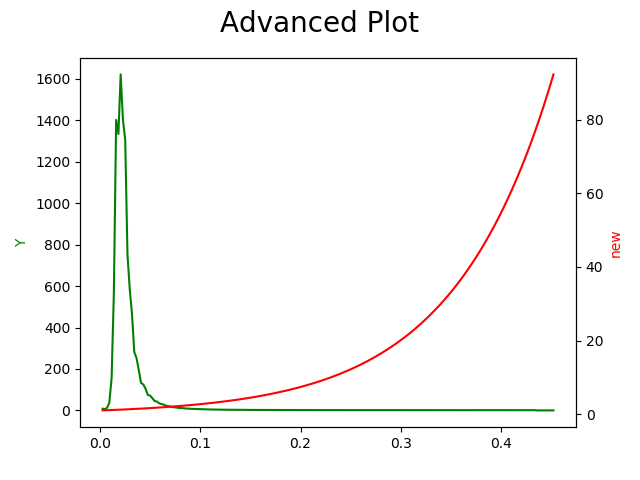

Text(0.5,0.98,'Advanced Plot')

In [58]:
fig, ax1 = plt.subplots()  # create figure and axes
ax1.plot(data_new['X'], data_new['Y'], color='green')
ax1.set_ylabel('Y', color='green')

ax2 = ax1.twinx()
ax2.plot(data_new['X'], data_new['new'], color='red')
ax2.set_ylabel('new', color='red')

fig.suptitle('Advanced Plot', fontsize=20)

<IPython.core.display.Javascript object>


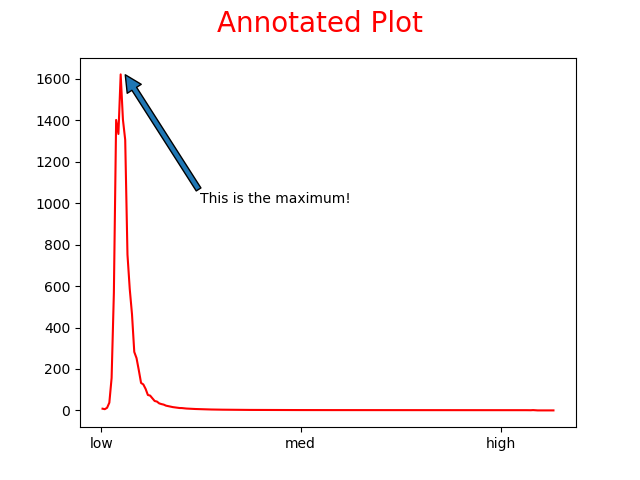

Text(0.5,0.98,'Annotated Plot')

In [59]:
fig, ax = plt.subplots()  # create figure and axes
ax.plot(data_new['X'], data_new['Y'], color='red')
ax.set_xticks([0.001, 0.2, 0.4])
ax.set_xticklabels(['low', 'med', 'high'])
# https://matplotlib.org/users/annotations.html
ax.annotate(
    'This is the maximum!', 
    xy=(0.025, 1620), # Coordinate where the head is 
    xytext=(0.1, 1000), # Coordinate where the text starts
    arrowprops={}, # This is an empty dictionary! More details in the Fitting Notebook
)
fig.suptitle('Annotated Plot', fontsize=20, color='red')